In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report, roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



df_original = pd.read_csv('./files/data/Placement_Data_Full_Class.csv')
df_original.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

<h4>What column name refers to</h4>
<ul>
    <li>
        <p>ssc_p: Secondary Education(%) 10th Grade</p>
    </li>
    <li>
        <p>ssc_b: 10th Board of Education</p>
    </li>
    <li>
        <p>hsc_p: Higher Secondary Education(%) 12th Grade</p>
    </li>
    <li>
        <p>hsc_b: 12th Board of Education</p>
    </li>
    <li>
        <p>hsc_s: Specialization in Higher Secondary Education</p>
    </li>
    <li>
        <p>degree_p: Undergraduate (%)</p>
    </li>
    <li>
        <p>degree_t: Undergraduate degree type</p>
    </li>
    <li>
        <p>workex: Work experience</p>
    </li>
    <li>
        <p>etest_p: Placement test (%)</p>
    </li>
    <li>
        <p>specialisation: MBA specialisation</p>
    </li>
    <li>
        <p>mba_p: MBA (%)</p>
    </li>
    <li>
        <p>status:- Hiring status</p>
    </li>
</ul>

In [3]:
df_no_salary = df_original.copy()
df_no_salary.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [4]:
# droping the salary and the id columns
df_no_salary = df_no_salary.drop(['salary','sl_no'], axis=1)
df_no_salary.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status  
0     No     55.0         Mkt&HR  58.80      Placed  
1    Yes     86.5        Mkt&Fin  66.28      Placed  
2     No     75.0        Mkt&Fin  57.80      Placed  
3     No     66.0         Mkt&HR  59.43  Not Placed  
4     No     96.8        Mkt&Fin  55.50      Placed

<h3>(EDA - Exploratory Data Analysis) on the df_original</h3>
<h4>Understanding the big picture</h4>
<p>In this phase we are going to use the methods below to get a general understanding of the data on the df_original DataSet.</p> 
<ul>
    <li>
        <p><span style="color: #6666FF">.shape</span> : TODO</p>
    </li>
    <li>
        <p><span style="color: #6666FF">.describe()</span> : TODO</p>
    </li>
    <li>
        <p><span style="color: #6666FF">.info()</span> : TODO</p>
    </li>
    <li>
        <p><span style="color: #6666FF">.duplicated().sum()</span> : TODO</p>
    </li>
</ul>


In [5]:
df_original.shape

(215, 15)

In [6]:
df_original.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
#checking for duplicated rows
df_original.duplicated().sum()

0

<h4>Explanatory Data Analysis</h4>

<p>We first start with a pairplot from the seaborn library using sns.pariplot(). This will give us the correlation of all numeric variables in the dataset. We've also set hue = 'status' to see how the value distribute under different status. This can help us better identify variables later in the classifier.</p>

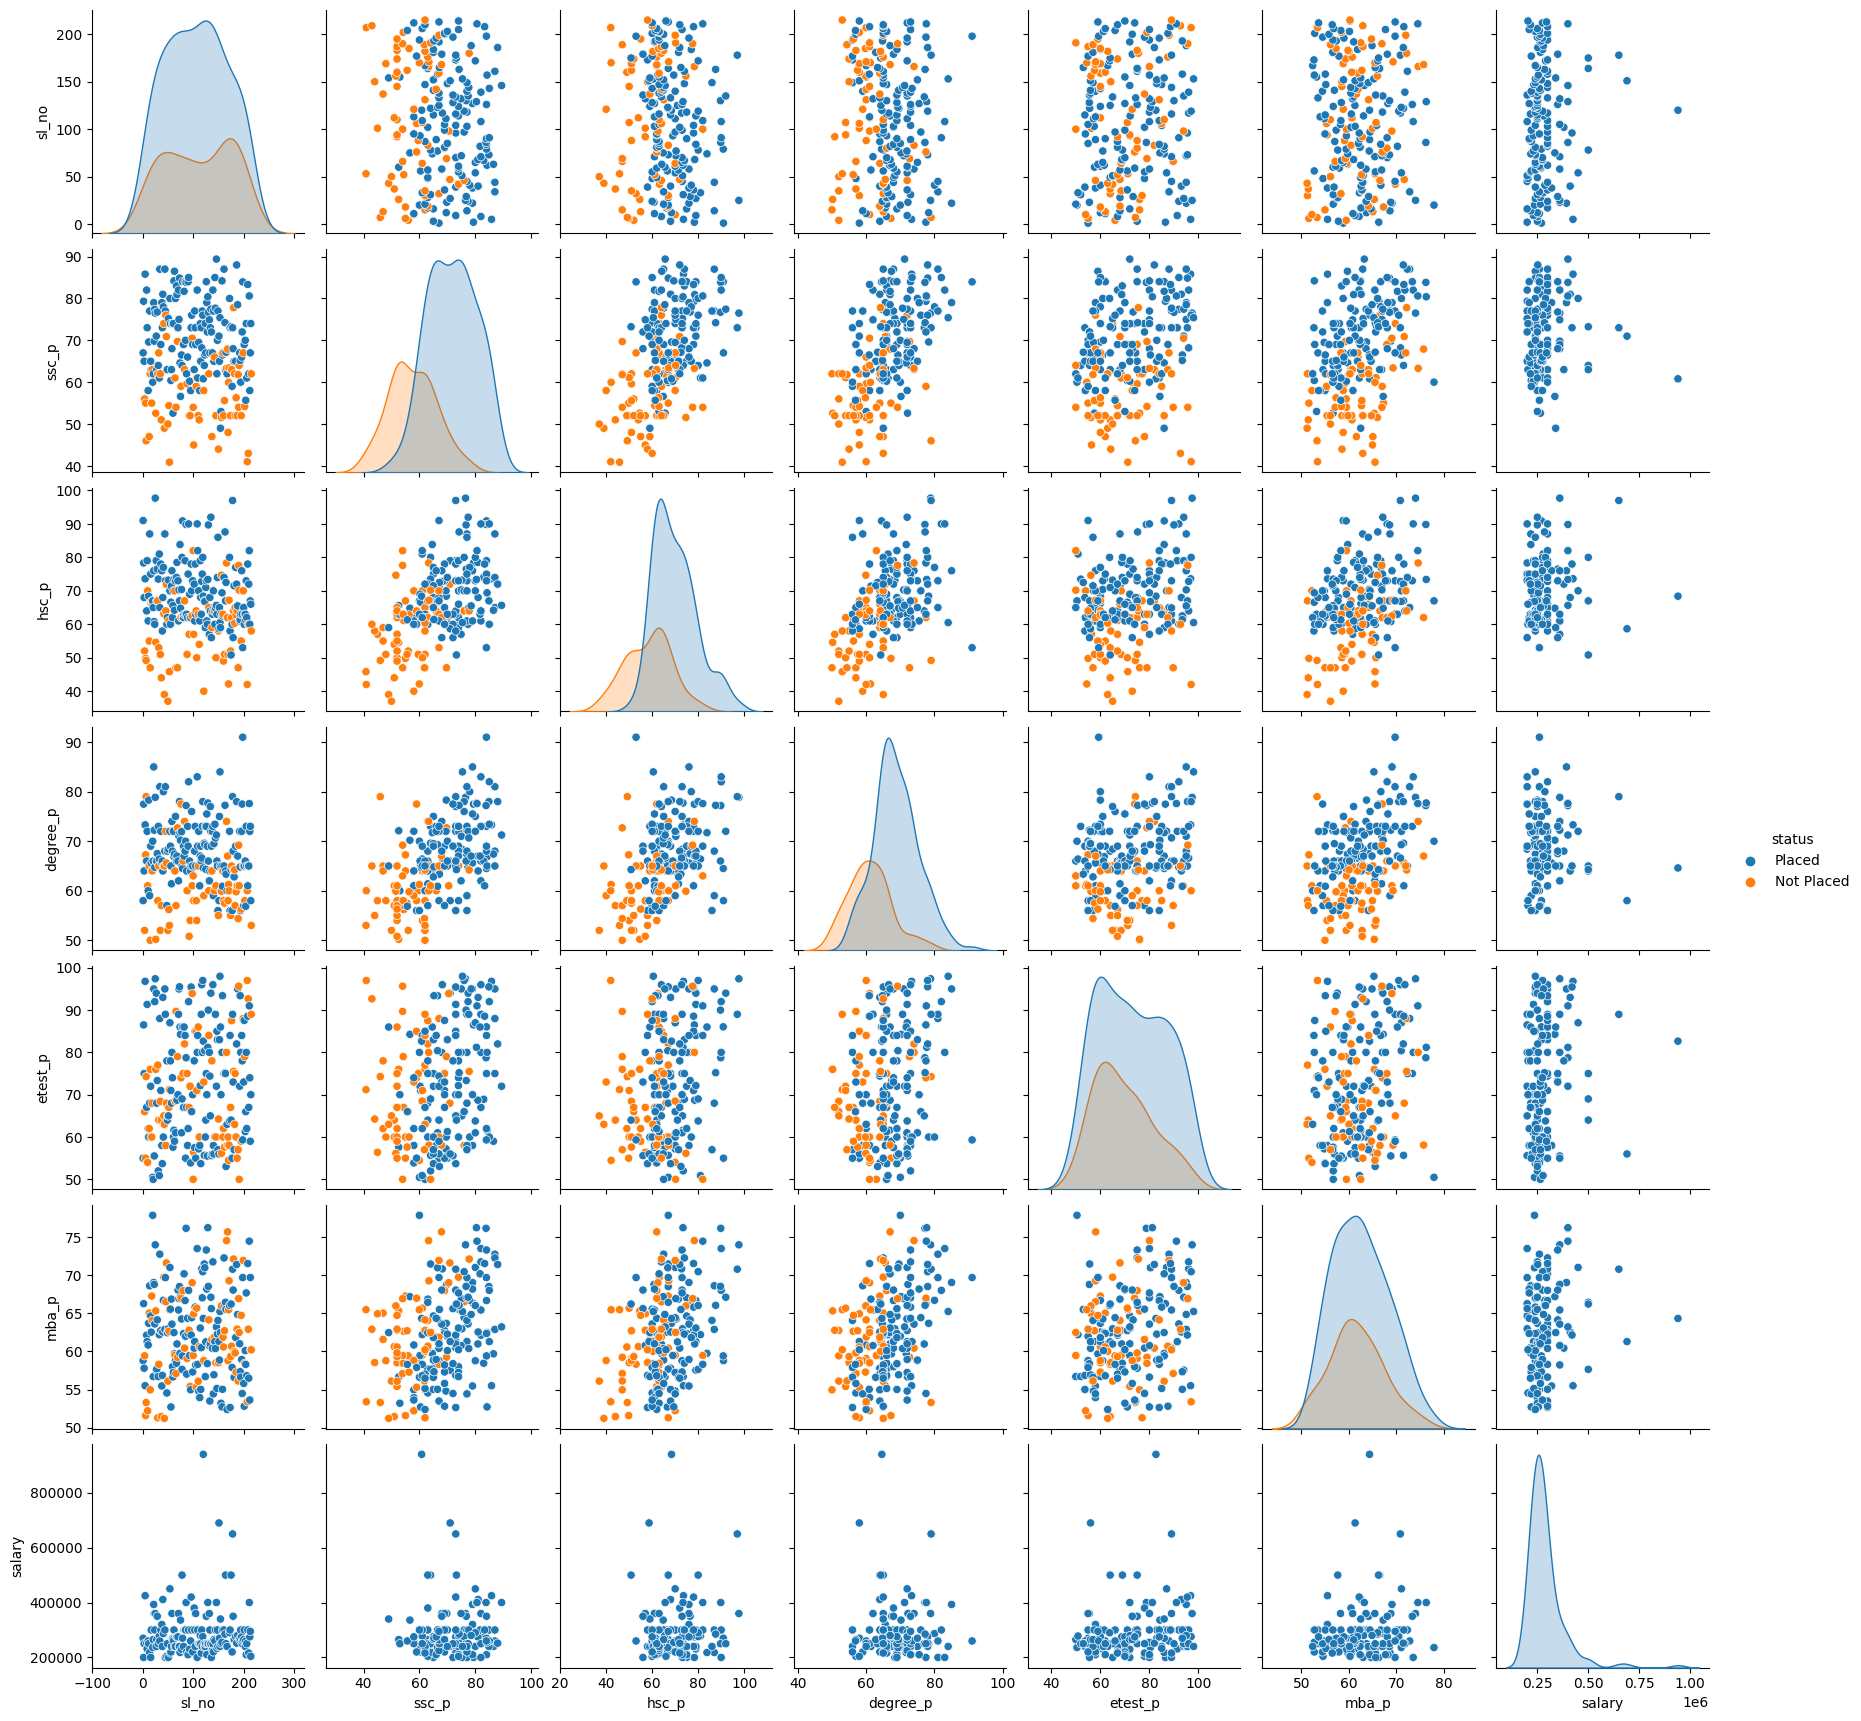

In [9]:
sns.pairplot(df_original, hue = 'status')

We then want to see the student status by gender. From the table below and the barplot, we can see that more male students were placed a job then female.

In [10]:
df_original.groupby(["gender","status"]).size().unstack()

status  Not Placed  Placed
gender                    
F               28      48
M               39     100

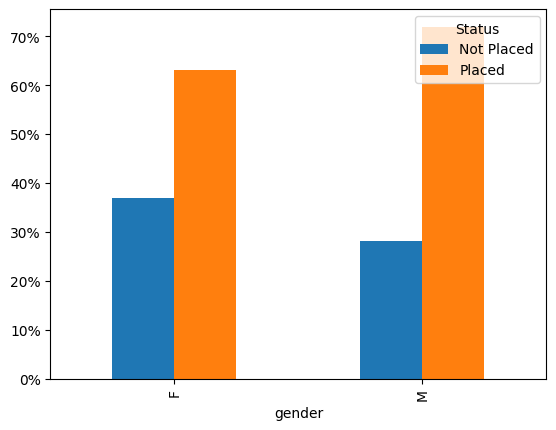

In [11]:
df_original.groupby(["gender","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=False)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Status')
plt.show()

<p>The following table shows the average of all the numeric variables under different status.</p>

In [12]:
df_original.groupby('status').mean(numeric_only=True)

sl_no      ssc_p      hsc_p   degree_p    etest_p      mba_p  \
status                                                                          
Not Placed  110.477612  57.544030  58.395522  61.134179  69.587910  61.612836   
Placed      106.878378  71.721486  69.926554  68.740541  73.238041  62.579392   

                   salary  
status                     
Not Placed            NaN  
Placed      288655.405405

<h4>Numeric variables</h4>

In [13]:
df_original_numeric = df_original[['ssc_p','hsc_p','degree_p','etest_p','mba_p','status']]

df_original_numeric_melt = pd.melt(df_original_numeric, id_vars='status')

df_original_numeric_melt.head()

status variable  value
0      Placed    ssc_p  67.00
1      Placed    ssc_p  79.33
2      Placed    ssc_p  65.00
3  Not Placed    ssc_p  56.00
4      Placed    ssc_p  85.80

<Axes: xlabel='variable', ylabel='value'>

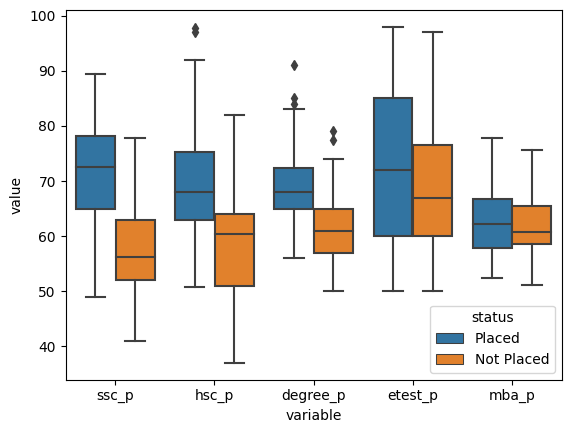

In [14]:
sns.boxplot(x="variable", y="value", hue="status", data=df_original_numeric_melt)

<h4>categorical variables</h4>

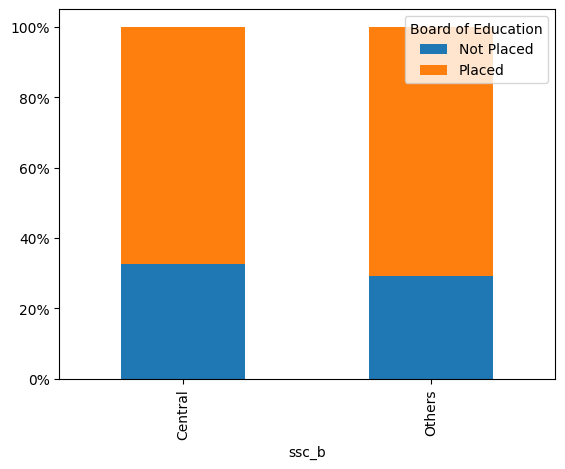

In [15]:
# then will look at all the categorical variables

# column description 
# ssc_b              Board of Education- Central/ Others
# hsc_b              Board of Education- Central/ Others
# hsc_s              Specialization in Higher Secondary Education
# degree_t           Under Graduation(Degree type)- Field of degree education
# workex             Work Experience
# specialisation     Post Graduation(MBA)- Specialization
# status             Status of placement- Placed/Not placed
# salary             Salary offered by corporate to candidates


# Board of Education - 10th grade
df_original.groupby(["ssc_b","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Board of Education')
plt.show()

# central and others almost no difference for secondary education board of education

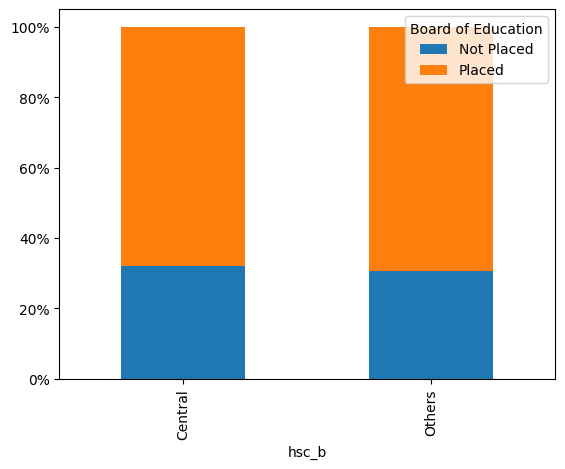

In [16]:
# Board of Education - 12th grade
df_original.groupby(["hsc_b","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Board of Education')
plt.show()

# similarly central and others almost no difference for secondary education board of education

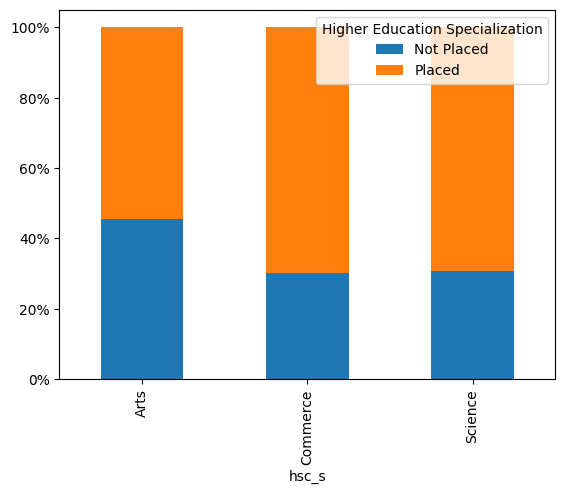

In [17]:
# Specialization in Higher Secondary Education
df_original.groupby(["hsc_s","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Higher Education Specialization')
plt.show()


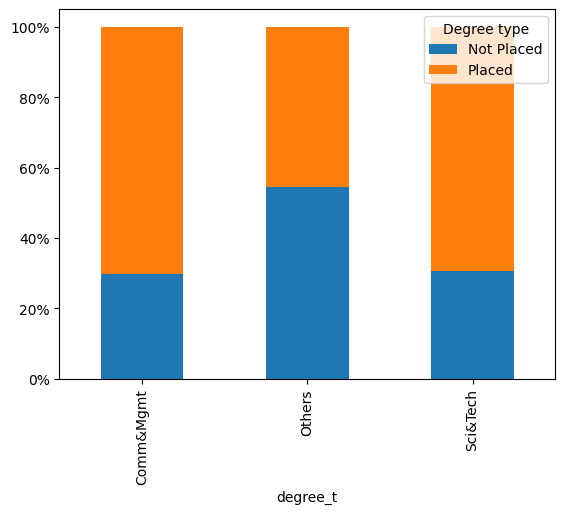

In [18]:
# Under Graduation(Degree type)- Field of degree education
df_original.groupby(["degree_t","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Degree type')
plt.show()

# for undergraduate degrees, comm/management and sci/tech are more likely to get placed

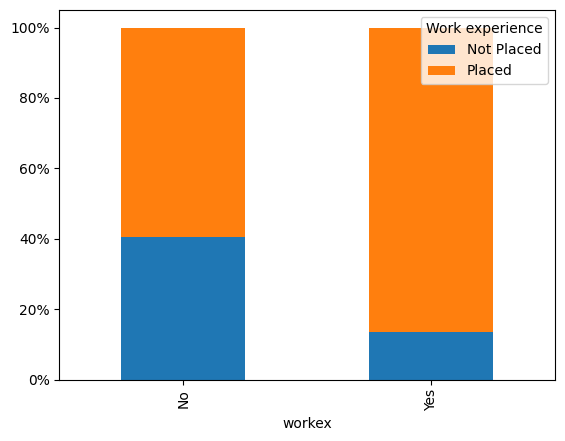

In [19]:
# Work Experience
df_original.groupby(["workex","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Work experience')
plt.show()

# having working experience is more likely to get placed and it has the most influence by comparing the graphs

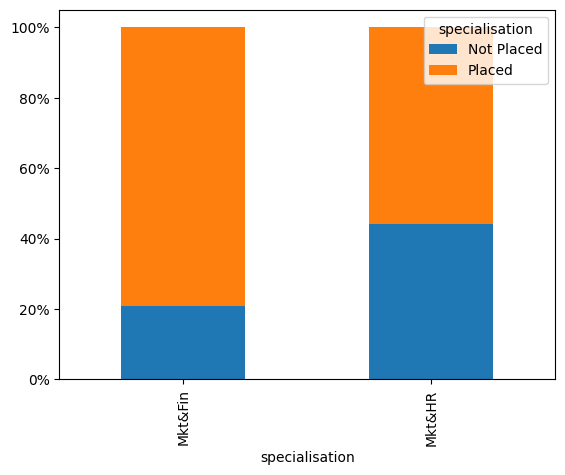

In [20]:
# Post Graduation(MBA)- Specialization
df_original.groupby(["specialisation","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'specialisation')
plt.show()

# mrkt/finance are more likely to get placed than mrkt/hr

<h4>To summarize</h4>
<ul>
    <li>
        <p>Board of Education - 10th grade and 12th grade has less influence on status</p>
    </li>
    <li>
        <p>For secondary education, commerce and science are more likely to get placed</p>
    </li>
    <li>
        <p>For undergraduate degrees, comm/management and sci/tech are more likely to get placed</p>
    </li>
    <li>
        <p>Having working experience is more likely to get placed and it has the most influence by comparing the graphs</p>
    </li>
    <li>
        <p>For Post Graduation(MBA), mrkt/finance are more likely to get placed than mrkt/hr</p>
    </li>
</ul>

<h4>Exercício 7</h4>
<p>Aplique o LabelEncoder nos atributos categóricos (gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status) de df_no_salary</p>

In [22]:
df_no_salary.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status  
0     No     55.0         Mkt&HR  58.80      Placed  
1    Yes     86.5        Mkt&Fin  66.28      Placed  
2     No     75.0        Mkt&Fin  57.80      Placed  
3     No     66.0         Mkt&HR  59.43  Not Placed  
4     No     96.8        Mkt&Fin  55.50      Placed

In [28]:
# instancia a classe LabelEncoder
label_encoder = LabelEncoder()

# aplica a tecnica de label encoder
df_no_salary['gender'] = label_encoder.fit_transform(df_no_salary['gender'])
df_no_salary['ssc_b'] = label_encoder.fit_transform(df_no_salary['ssc_b'])
df_no_salary['hsc_b'] = label_encoder.fit_transform(df_no_salary['hsc_b'])
df_no_salary['hsc_s'] = label_encoder.fit_transform(df_no_salary['hsc_s'])
df_no_salary['degree_t'] = label_encoder.fit_transform(df_no_salary['degree_t'])
df_no_salary['workex'] = label_encoder.fit_transform(df_no_salary['workex'])
df_no_salary['specialisation'] = label_encoder.fit_transform(df_no_salary['specialisation'])
df_no_salary['status'] = label_encoder.fit_transform(df_no_salary['status'])

df_no_salary.head()

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       1  67.00      1  91.00      1      1     58.00         2       0   
1       1  79.33      0  78.33      1      2     77.48         2       1   
2       1  65.00      0  68.00      0      0     64.00         0       0   
3       1  56.00      0  52.00      0      2     52.00         2       0   
4       1  85.80      0  73.60      0      1     73.30         0       0   

   etest_p  specialisation  mba_p  status  
0     55.0               1  58.80       1  
1     86.5               0  66.28       1  
2     75.0               0  57.80       1  
3     66.0               1  59.43       0  
4     96.8               0  55.50       1

<h4>Exercício 8</h4>
<p>Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo.</p>

In [44]:
# Divide em dois grupos independentes e dependentes
X = df_no_salary.drop('status', axis=1)
y = df_no_salary['status']

# Divide em grupo de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria uma instancia de LogisticRegression e molda ela para os dados
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Realiza predições no datase de testes
y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
linearR2Score = r2_score(y_test, y_pred)
linearMSE = mean_squared_error(y_test, y_pred)
linearRMSE = np.sqrt(linearMSE)
linearMAE = mean_absolute_error(y_test, y_pred)

print("Accuracy:", accuracy)
print("R2Score: ", linearR2Score)
print("MSE: ", linearMSE)
print("RMSE: ", linearRMSE)
print("MAE: ", linearMAE)

Accuracy: 0.8837209302325582
R2Score:  0.422043010752688
MSE:  0.11627906976744186
RMSE:  0.34099716973523675
MAE:  0.11627906976744186


<h4>Exercício 9</h4>
<p>Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.</p>

In [49]:
# Calcula e printa o report de classificaçãp
print(classification_report(y_test, y_pred))

# Calcula e printa o AUC 
auc_score = roc_auc_score(y_test, y_pred)
print("AUC:", auc_score)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

AUC: 0.842741935483871


<h5>Recall</h5>
<p>O Recall é uma métrica útil para avaliar o desempenho do modelo em identificar corretamente os casos positivos.

O resultado será um valor entre 0 e 1 onde quanto mais próximo de 1 o resultado melhor será o modelo em identificar corretamente os casos positivos.

Nesse caso temos um Recall de 0.75 que nos mostra que o modelo classificado possui uma taxa de sucesso de 75% em identificar corretamente os casos positivos.
</p>
<h5>Precision</h5>
<p>Precision indica a taxa de verdadeiros positivos dentro do valores dados como positivos, uma Precision alta mais próxima de 1 significa que o modelos possui alta proporção de verdadeiros positivos.
</p>
<h5>ROC e AUC</h5>

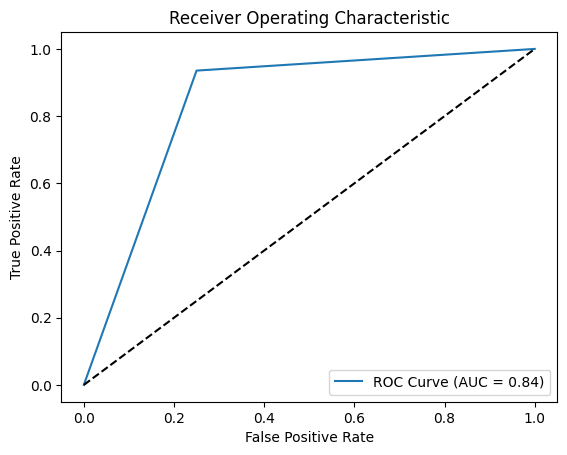

In [51]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

<p>Com um AUC de 0.84 o modelo é capaz de distinguir entre as classes com uma boa taxa de verdadeiros positivos.</p>

<h4>Exercício 10</h4>
<p>A partir de df_original, crie o Data Frame df_no_status agora removendo a coluna status,  aplicando o LabelEncoder, separe as amostras que não possuem o atributo salary (dados ausentes)</p>

In [81]:
df_no_status = df_original.copy()

# Remove a coluna status
df_no_status = df_no_status.drop(columns=['status'])

# Aplica a tecnica de label encoder
df_no_status['gender'] = label_encoder.fit_transform(df_no_salary['gender'])
df_no_status['ssc_b'] = label_encoder.fit_transform(df_no_salary['ssc_b'])
df_no_status['hsc_b'] = label_encoder.fit_transform(df_no_salary['hsc_b'])
df_no_status['hsc_s'] = label_encoder.fit_transform(df_no_salary['hsc_s'])
df_no_status['degree_t'] = label_encoder.fit_transform(df_no_salary['degree_t'])
df_no_status['workex'] = label_encoder.fit_transform(df_no_salary['workex'])
df_no_status['specialisation'] = label_encoder.fit_transform(df_no_salary['specialisation'])

# Separa as amostras com o atributo salary ausentes
df_no_status_clean = df_no_status.dropna(subset=['salary']).copy()
df_no_status_no_salary = df_no_status[df_no_status['salary'].isna()].copy()

df_no_status_no_salary.head()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
3       4       1   56.0      0   52.0      0      2     52.00         2   
5       6       1   55.0      1   49.8      1      2     67.25         2   
6       7       0   46.0      1   49.2      1      1     79.00         0   
9      10       1   58.0      0   70.0      0      1     61.00         0   
12     13       0   47.0      0   55.0      1      2     65.00         0   

    workex  etest_p  specialisation  mba_p  salary  
3        0    66.00               1  59.43     NaN  
5        1    55.00               0  51.58     NaN  
6        0    74.28               0  53.29     NaN  
9        0    54.00               0  52.21     NaN  
12       0    62.00               1  65.04     NaN

<h4>Exercício 11</h4>
<p>Treine um modelo de regressão linear múltipla e preveja os salários (salary) das amostras que não possuem essa informação em df_no_status</p>

In [87]:
# Seleciona as variaveis independentes(X) e a variavel dependente(Y)
X = df_no_status_clean.drop('salary', axis=1)
y = df_no_status_clean['salary']

# Instancia o modelo de regressão linear
model = LinearRegression()

# Molda os dados para o modelo 
model.fit(X, y)

df_no_status_no_salary_droped = df_no_status_no_salary.drop('salary', axis=1)

predicted_salary = model.predict(df_no_status_no_salary_droped)
print(predicted_salary)

[317262.13755501 280071.3207936  213591.66973095 261721.83985774
 259872.64807378 270563.34593582 284974.10897949 254594.80355413
 321538.64576405 274491.63014002 254582.88272914 310647.35292536
 265706.31858632 267080.67497151 275623.01796447 266631.9254822
 281319.97242864 244063.75869101 298499.20256544 287244.74621182
 272031.35759593 290463.69566568 242956.52700753 243158.91242776
 300270.75795257 285249.19029123 298464.0780859  311203.18817988
 286553.51080054 299619.32331746 315842.82521031 283797.23995028
 309198.19224597 354659.96066835 315994.45034061 313115.47018871
 279496.72716275 318637.24775828 280542.88391633 292228.05419731
 280172.11732075 301245.13729178 321501.94798459 324107.88791862
 281154.16191009 289276.82194266 308645.02790436 374206.59546286
 267995.48617129 315996.51986364 282242.52927127 297531.67336977
 322974.94122632 319519.0319812  302563.86225184 334706.80121697
 247531.83070129 286762.67986523 282981.58868223 310135.83417237
 280054.23391121 324151.81

<h4>Exercício 12</h4>
<p>Para as amostras que não possuem o atributo salary preenchidos em df_no_status, inclua o valor previsto pelo modelo de regressão linear múltipla</p>